In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
metal = 'CA'
embed_dict_path = f"../data/{metal}_train_embeddings.pkl"

In [3]:
from k2 import K2Processor

In [4]:
args = {"datatype":"protein",
        "k":20,
        "quantizer_type":"kmeans",
        "embeddings_path":embed_dict_path,
        "embeddings_type":"dict",
        "mapping_path": None,
        "sample_size":4440,
        "sample_scheme":"random",
        "dataset_path":"/home/data/tinycam/train/train.hdf5",
        "verbosity": "full",
        "so_dict_path": None}
proc = K2Processor(args)

Embeddings path provided, loading embeddings...


In [5]:
proc.fit_quantizer()

Chosen KMeans model for quantization...
sampled 1999 known salient objects!
total embeds: 366205
collapsing from dim 512 --> 2


/oak/stanford/groups/rbaltman/aderry/miniconda3/envs/collapse3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


subsampling negative elements to n=10000


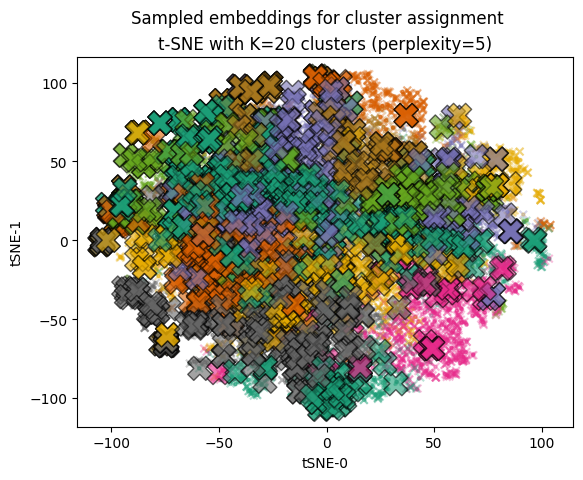

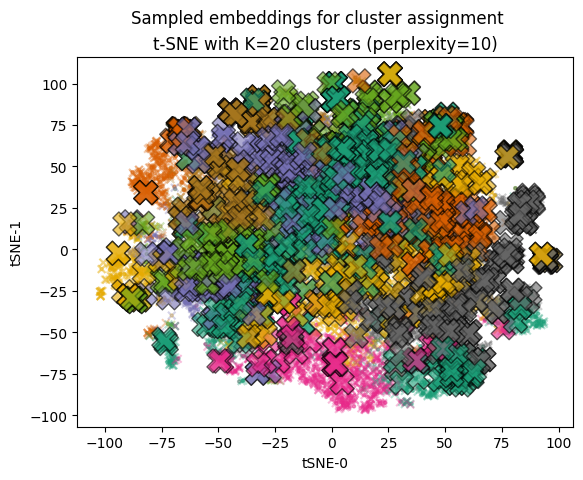

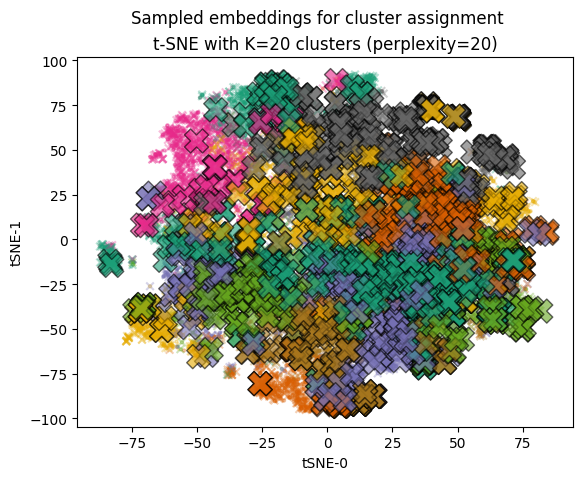

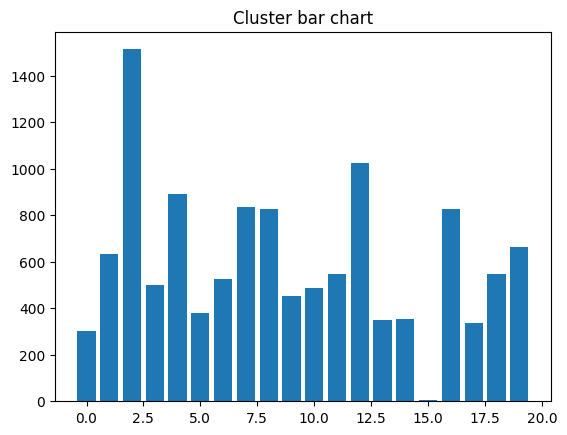

In [17]:
proc.visualize_quantizer(subsample=10000)

# Sprite construction

In [6]:
metal = 'CA'
G_dir = f"../data/{metal}_train_graphs"

In [7]:
import utils
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import networkx as nx
import os

In [8]:
os.listdir(G_dir)[:10]

['3mdoA.pkl',
 '1kzlA.pkl',
 '1heiA.pkl',
 '2wm5A.pkl',
 '4itxA.pkl',
 '1pj5A.pkl',
 '3gkeB.pkl',
 '1hn0A.pkl',
 '5llbA.pkl',
 '2nxfA.pkl']

Graph with 353 nodes and 1724 edges


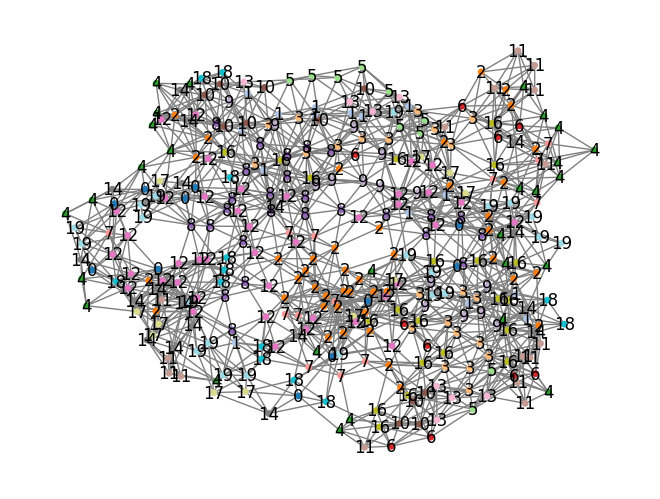

In [9]:
G_id = "3mdoA"
G_path = G_dir + "/" + G_id + ".pkl"
G = utils.deserialize(G_path)

sprite = utils.construct_sprite(G, proc)
print(sprite)
utils.visualize_sprite(sprite, modality="graph")

In [26]:
# nglview.show_file(f'/scratch/users/aderry/pdb/{G_id[1:3]}/{G_id}.ent.gz', ext='.ent.gz', compressed=True)
view = utils.visualize_protein_sprite(sprite)
view

NGLWidget()

In [47]:
import collections as col
col.Counter(nx.get_node_attributes(sprite, 'emb').values())

Counter({4: 28,
         7: 13,
         11: 16,
         2: 43,
         0: 11,
         16: 21,
         6: 10,
         3: 22,
         12: 41,
         14: 18,
         8: 26,
         19: 21,
         17: 11,
         18: 13,
         1: 15,
         9: 15,
         5: 10,
         13: 8,
         10: 11})

In [10]:
from k2 import K2Model

In [128]:
# # hyperparameter sweep
# Ks = [10,15,20,25,30]
# rs = [0,1,2,4,8]
# alphas = [0.01, 0.025, 0.05, 1e10]
# taus = [0,1,2]

In [32]:
# label_dict = utils.deserialize("/home/data/tinycam/train/" + modelstr + "-label_dict.pkl")
hparams = {"alpha": 0.0001, "tau": 0, "lambda": 0.5}
args = {"modality":"graph",
        "processor":proc,
        "r":2,
        "variant": "inferential",
        "hparams": hparams,
        "train_graph_path": G_dir}

In [33]:
k2m = K2Model(args)

In [34]:
k2m.create_train_array()

Creating K2 training array...:   0%|          | 0/1016 [00:00<?, ?it/s]

Complete! Created a training array for few-shot classification...
Number of training examples: 1016
Number of Kk features: 230


In [35]:
k2m.fit_kernel()

Normalizing training data with TF-IDF...
Differential Expression with alpha,tau: 0.0001,0


<BarContainer object of 230 artists>

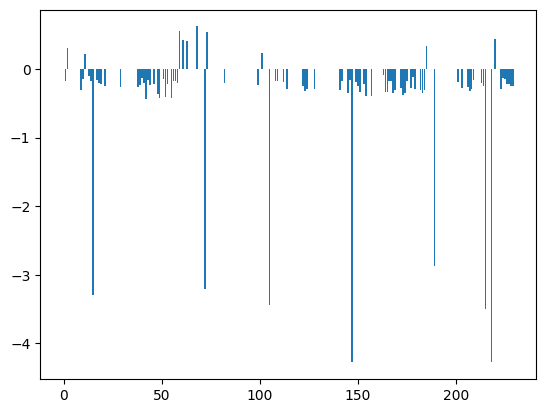

In [36]:
plt.bar(x=range(len(k2m.B)), height=list(k2m.B))

In [63]:
test_graph_path = f'../data/{metal}_test_graphs'

print(os.listdir(test_graph_path)[:5])

G = utils.deserialize(os.path.join(test_graph_path, os.listdir(test_graph_path)[0]))
print(G.graph['label'])
P = k2m.prospect(G)
print(P)

['1v04A.pkl', '5u3aA.pkl', '3k28C.pkl', '5iheB.pkl', '1x7dB.pkl']
1
Graph with 332 nodes and 1749 edges


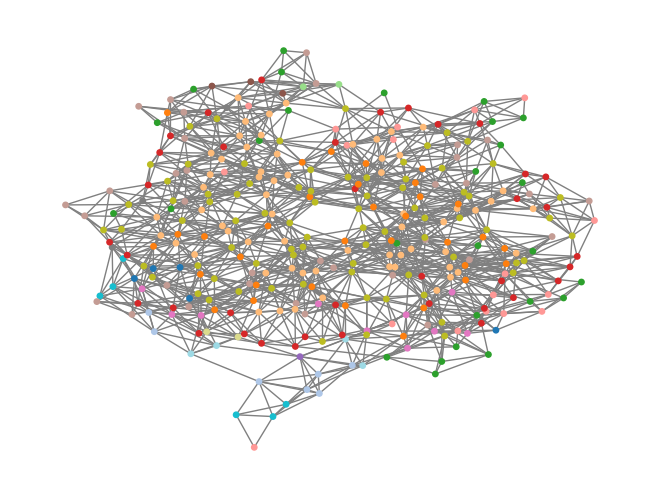

In [64]:
sprite = utils.construct_sprite(G, proc)
utils.visualize_sprite(sprite, modality="graph")

In [41]:
utils.visualize_protein_sprite(sprite)

NGLWidget()

Displaying motif graph with log10 scaling


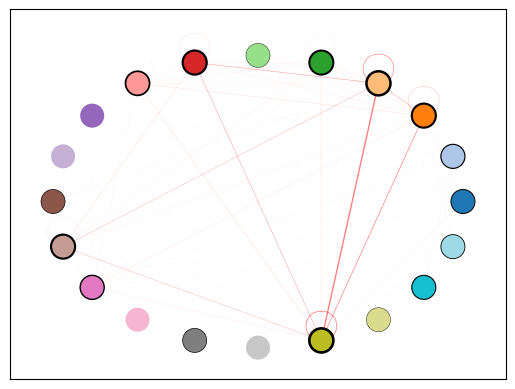

In [77]:
k2m.visualize_motif_graph(G)

No G provided, showing model-wide kernel hash-graph
Displaying motif graph with log2 scaling


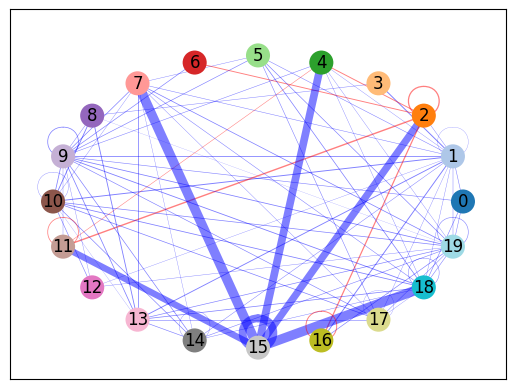

In [78]:
k2m.visualize_motif_graph(labels=True)

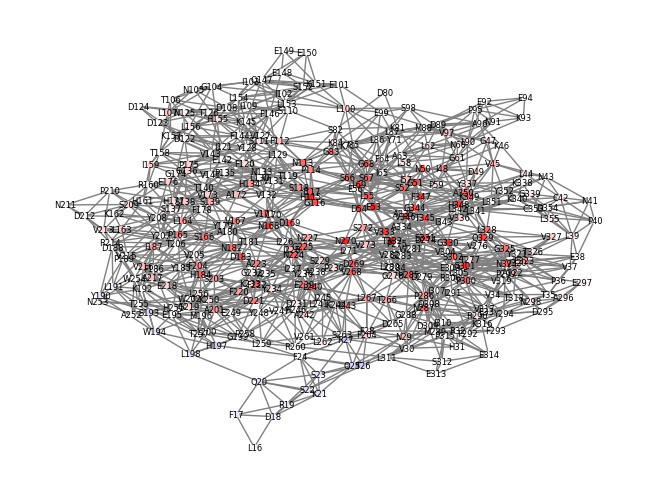

In [66]:
k2m.visualize_prospect_graph(P)

In [68]:
utils.visualize_protein_sprite(P, prospect_flag=True)

NGLWidget()

In [55]:
db = utils.deserialize('../data/metal_database_balanced.pkl')

In [59]:
G.graph['id']

'2bfdB'

In [70]:
pos_df = db['CA']['pos']
pos_df[pos_df['pdb_chain'] == G.graph['id']]['interactions'].tolist()

[['PO4_1358',
  'GLU_53',
  'ASN_224',
  'ASP_269',
  'HOH_2009',
  'ASN_168',
  'ASN_270'],
 ['PO4_1358',
  'GLU_53',
  'ASN_224',
  'ASP_269',
  'HOH_2009',
  'ASN_168',
  'ASN_270'],
 ['PO4_1358',
  'GLU_53',
  'ASN_224',
  'ASP_269',
  'HOH_2009',
  'ASN_168',
  'ASN_270'],
 ['HOH_2011', 'ASP_169', 'HOH_2053', 'HOH_2010', 'ILE_117', 'ASP_54'],
 ['HOH_2011', 'ASP_169', 'HOH_2053', 'HOH_2010', 'ILE_117', 'ASP_54'],
 ['HOH_2011', 'ASP_169', 'HOH_2053', 'HOH_2010', 'ILE_117', 'ASP_54']]